In [1]:
# load the data as `data` and lines as `lines` variable
%run helper.py {8}

import numpy as np

data = """30373
25512
65332
33549
35390"""

lines = data.split("\n")

In [2]:
marr = np.zeros((len(lines), len(lines[0])), dtype="uint8")
for i, line in enumerate(lines):
    for j, n in enumerate(line):
        marr[i, j] = n

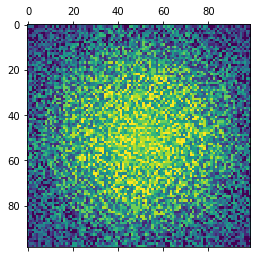

In [3]:
from matplotlib import pyplot as plt

plt.matshow(marr);

### Part 1

In [4]:
def is_visible(tree_position, marr=marr):
    r_max, c_max = marr.shape
    i, j = tree_position
    tree = marr[i, j]
    
    def on_border(i=i, j=j, r_max=r_max, c_max=c_max):
        return (i in [0, r_max-1]) or (j in [0, c_max-1])
    def v_left(t=tree, m=marr, i=i, j=j):
        return np.all(m[i, :j] < t)
    def v_right(t=tree, m=marr, i=i, j=j):
        return np.all(m[i, j+1:] < t)
    def v_up(t=tree, m=marr, i=i, j=j):
        return np.all(m[:i, j] < t)
    def v_down(t=tree, m=marr, i=i, j=j):
        return np.all(m[i+1:, j] < t)
    
    if on_border():
        return True, "border"
    elif v_left():
        return True, "left"
    elif v_right():
        return True, "right"
    elif v_up():
        return True, "up"
    elif v_down():
        return True, "down"
    else:
        return False, "not visible"

In [5]:
trees = dict()
n_visibles = 0
it = 0
for pos in np.ndindex(marr.shape):
    it += 1
    vis, d = is_visible(pos)
    if vis:
        n_visibles += 1
    trees[pos] = {"tree_height": marr[pos], "visible":vis, "direction":d}
    

In [6]:
n_visibles

1676

In [37]:
{k:v for k, v in trees.items() if v["direction"] != "border"}

{(1, 1): {'tree_height': 5, 'visible': True, 'direction': 'left'},
 (1, 2): {'tree_height': 5, 'visible': True, 'direction': 'right'},
 (1, 3): {'tree_height': 1, 'visible': False, 'direction': 'not visible'},
 (2, 1): {'tree_height': 5, 'visible': True, 'direction': 'right'},
 (2, 2): {'tree_height': 3, 'visible': False, 'direction': 'not visible'},
 (2, 3): {'tree_height': 3, 'visible': True, 'direction': 'right'},
 (3, 1): {'tree_height': 3, 'visible': False, 'direction': 'not visible'},
 (3, 2): {'tree_height': 5, 'visible': True, 'direction': 'left'},
 (3, 3): {'tree_height': 4, 'visible': False, 'direction': 'not visible'}}

<pre>
30373
25512
65332
33549
35390
</pre>

### Part 2

In [3]:
def visible_scenery(tree_position, marr=marr):
    r_max, c_max = marr.shape
    i, j = tree_position
    tree = marr[i, j]
    
    def closest_tree(t, cc):
        if np.prod(cc < t):
            return len(cc)
        else:
            return np.argmax(cc >= t) + 1
    
    def on_border(i=i, j=j, r_max=r_max, c_max=c_max):
        if (i in [0, r_max-1]) or (j in [0, c_max-1]):
            return 0
        else:
            return 1

    def v_left(t=tree, m=marr, i=i, j=j):
        cc = m[i, :j][::-1]
        return closest_tree(t, cc)

    def v_right(t=tree, m=marr, i=i, j=j):
        cc = m[i, j+1:]
        return closest_tree(t, cc)

    def v_up(t=tree, m=marr, i=i, j=j):
        cc = m[:i, j][::-1]
        return closest_tree(t, cc)

    def v_down(t=tree, m=marr, i=i, j=j):
        cc = m[i+1:, j]
        return closest_tree(t, cc)

    return [on_border(), v_left(), v_right(),  v_up(), v_down()]

In [4]:
sceneries = dict()
scenic_score = []
it = 0
for pos in np.ndindex(marr.shape):
    it += 1
    scenery = visible_scenery(pos)
    scenic_score.append(np.prod(scenery))
    sceneries[pos] = {"tree_height": marr[pos], "scenery": scenery}

In [5]:
np.max(scenic_score)

313200

In [42]:
{k: v for k, v in sceneries.items() if v["scenery"][0] > 0}

{(1, 1): {'tree_height': 5, 'scenery': [1, 1, 1, 1, 1]},
 (1, 2): {'tree_height': 5, 'scenery': [1, 1, 2, 1, 2]},
 (1, 3): {'tree_height': 1, 'scenery': [1, 1, 1, 1, 1]},
 (2, 1): {'tree_height': 5, 'scenery': [1, 1, 3, 1, 2]},
 (2, 2): {'tree_height': 3, 'scenery': [1, 1, 1, 1, 1]},
 (2, 3): {'tree_height': 3, 'scenery': [1, 1, 1, 2, 1]},
 (3, 1): {'tree_height': 3, 'scenery': [1, 1, 1, 1, 1]},
 (3, 2): {'tree_height': 5, 'scenery': [1, 2, 2, 2, 1]},
 (3, 3): {'tree_height': 4, 'scenery': [1, 1, 1, 3, 1]}}